<a href="https://colab.research.google.com/github/orus-kade/I-Profi-2020-Olimps/blob/master/AvanesovArtem_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Чтение и распаковка данных

In [0]:
base_dir = '/content/drive/My Drive/Colab/Roonyx/work_5'
zip_path = base_dir + '/leaf_diseases.zip'
unzip_path = base_dir + '/dataset'

!mkdir '$unzip_path'
!unzip -d '$unzip_path' '$zip_path'

# Построение диаграммы распределения классов

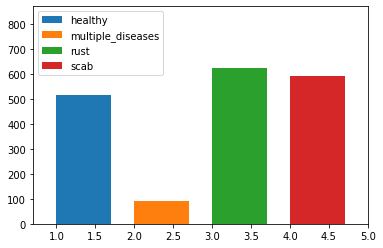

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

leafs = pd.read_csv(unzip_path+'/plant-pathology-2020-fgvc7/train.csv') 
y = np.array(leafs.drop(["image_id"], axis=1).values)

num_healthy = sum(y[:,0])
num_multiple_diseases = sum(y[:,1])
num_rust = sum(y[:,2])
num_scab = sum(y[:,3])

plt.hist([1]*num_healthy,bins=4, label = "healthy", width = 0.7)
plt.hist([2]*num_multiple_diseases,bins=4, label = "multiple_diseases", width = 0.7)
plt.hist([3]*num_rust,bins=4, label = "rust", width = 0.7)
plt.hist([4]*num_scab,bins=4, label = "scab", width = 0.7)
plt.ylim(0,max(num_healthy,num_multiple_diseases,num_rust, num_scab)*1.4)
plt.xlim(0.7,5)
plt.legend(loc='best')

# Создание директорий для трейн, тест, валидации

In [0]:
import os

splitted_dataset_path = base_dir + '/splitted_dataset'
os.mkdir(splitted_dataset_path)

train_dir = os.path.join(splitted_dataset_path, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(splitted_dataset_path, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(splitted_dataset_path, 'test')
os.mkdir(test_dir)

for path in [train_dir, test_dir, validation_dir]:
  for num_class in [0,1,2,3]:
    class_dir = os.path.join(path, str(num_class) + '_class')
    os.mkdir(class_dir)

## Определение индексов картинок, относящихся к определенному классу

In [0]:
indices_class_0, indices_class_1, indices_class_2, indices_class_3 = [], [], [], []
for i in range(0, len(y),1):
  if(np.argmax(y[i]) == 0):
    indices_class_0.append(i)
  elif(np.argmax(y[i]) == 1):
    indices_class_1.append(i)
  elif(np.argmax(y[i]) == 2):
    indices_class_2.append(i)
  elif(np.argmax(y[i]) == 3):
    indices_class_3.append(i)

## Перемешивание массивов индексов

In [0]:
import random

# Перемешивание массивов индексов
random.shuffle(indices_class_0)
random.shuffle(indices_class_1)
random.shuffle(indices_class_2)
random.shuffle(indices_class_3)

# Объединение массивов индексов в один (для удобства)
indices_classes = [indices_class_0, indices_class_1, indices_class_2, indices_class_3]

### Вычисление количества элементов в тестовых, обучающих и валидационных выборках

In [0]:
import pandas as pd

percent_validation = 10
percent_test = 10

num_test = []
num_validation = []
num_train = []
for i in range(0,4,1):
  num_test.append(int(len(indices_classes[i])*percent_test/100))
  num_validation.append(int(len(indices_classes[i])*percent_validation/100))
  num_train.append(len(indices_classes[i])-num_test[-1] - num_validation[-1])

array_for_pandas = np.transpose([num_train, num_test, num_validation])

df = pd.DataFrame({
     '': ['Train', 'Test', 'Validation'],
     'Class 0': array_for_pandas[0,:],
     'Class 1': array_for_pandas[1,:],
     'Class 2': array_for_pandas[2,:],
     'Class 3': array_for_pandas[3,:]
 })

df

,,Class 0,Class 1,Class 2,Class 3
0,Train,414,73,498,474
1,Test,51,9,62,59
2,Validation,51,9,62,59


## Запись данных с обучающими, тестовыми и валидационными выборками

In [0]:
import shutil

src = unzip_path + '/plant-pathology-2020-fgvc7/images'

# Копирование тестовых картинок 
for num_class in [0,1,2,3]:
  test_fnames = ['Train_{}.jpg'.format(i) for i in indices_classes[num_class][0:num_test[num_class]]]
  for fname in test_fnames:
    shutil.copyfile(src+'/'+fname, test_dir+'/'+str(num_class)+'_class'+'/'+fname)

# Копирование валидационных картинок 
for num_class in [0,1,2,3]:
  validation_fnames = ['Train_{}.jpg'.format(i) for i in indices_classes[num_class][num_test[num_class]:num_test[num_class] + num_validation[num_class]]]
  for fname in validation_fnames:
    shutil.copyfile(src+'/'+fname, validation_dir+'/'+str(num_class)+'_class'+'/'+fname)

# Копирование обучающих картинок 
for num_class in [0,1,2,3]:
  train_fnames = ['Train_{}.jpg'.format(i) for i in indices_classes[num_class][num_test[num_class] + num_validation[num_class]:]]
  for fname in train_fnames:
    shutil.copyfile(src+'/'+fname, train_dir+'/'+str(num_class)+'_class'+'/'+fname)